In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [48]:

team_ratings = pd.read_csv("Data/nba_team_ratings.csv")

In [49]:
team_ratings.describe()

,W,L,W/L%,DRtg,Season
count,360.000000,360.000000,360.000000,360.000000,360.000000
mean,40.108333,40.108333,0.499569,111.229861,2019.500000
std,12.205161,12.039486,0.148802,4.224598,3.456857
min,10.000000,9.000000,0.122000,99.550000,2014.000000
25%,32.000000,31.750000,0.402000,108.185000,2016.750000
50%,42.000000,39.000000,0.512000,111.405000,2019.500000
75%,49.000000,49.000000,0.610000,114.220000,2022.250000
max,73.000000,72.000000,0.890000,121.390000,2025.000000


<function matplotlib.pyplot.show(close=None, block=None)>

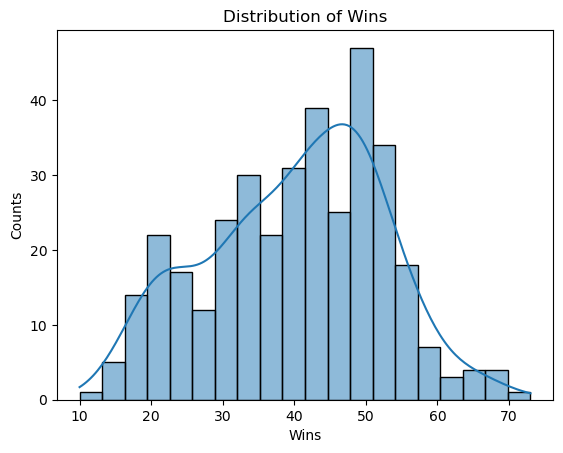

In [50]:
#Find the Distribution of wins
sns.histplot(team_ratings['W'], bins=20, kde=True)
plt.title("Distribution of Wins")
plt.xlabel("Wins")
plt.ylabel("Counts")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

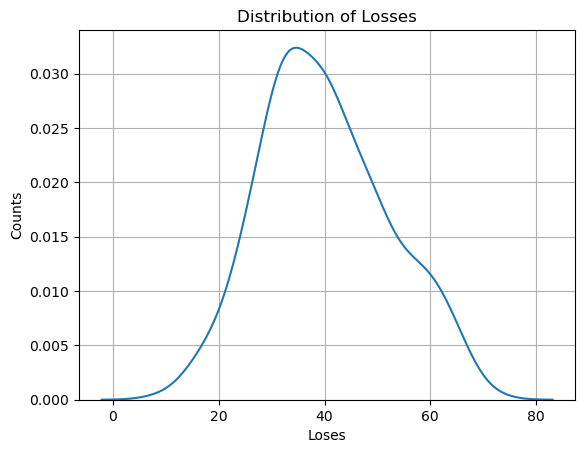

In [51]:
#Find Distribution of Losses
sns.kdeplot(team_ratings['L'])
plt.title("Distribution of Losses")
plt.xlabel("Loses")
plt.ylabel("Counts")
plt.grid(True)
plt.show

    Season        DRtg
0     2014  107.381667
1     2015  106.446667
2     2016  107.133333
3     2017  109.529000
4     2018  109.320667
5     2019  111.069667
6     2020  111.440000
7     2021  113.100667
8     2022  112.851000
9     2023  115.682667
10    2024  116.184333
11    2025  114.618667


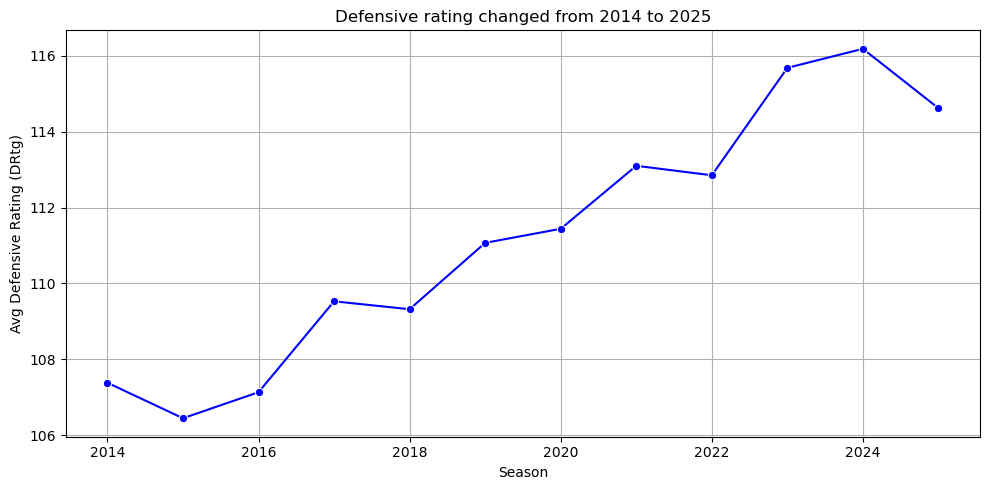

In [52]:
#Calculate the  avg defensive ratings changes over the years
avg_drtg_by_season = team_ratings.groupby('Season')['DRtg'].mean().reset_index()
print(avg_drtg_by_season)


plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_drtg_by_season, x='Season', y='DRtg', marker='o', color='blue')
plt.title("Defensive rating changed from 2014 to 2025")
plt.xlabel("Season")
plt.ylabel("Avg Defensive Rating (DRtg)")
plt.grid(True)
plt.tight_layout()
plt.show()



The above line plot shows how the average team defensive rating has trended over the seasons. The defense across the league has worsened and less efficient over the last ten years with rating contiuing to increase over the last 10 years with its highest rating of 116.18 in 2024. The year 2015 had the lowest defensive rating with 106.44. This means teams are allowing more points per 100 possessins.

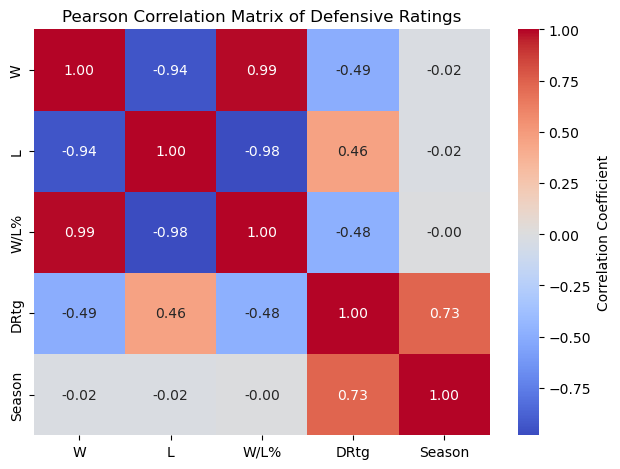

In [53]:
# Calculate the correlation matrix
# Select only numeric columns for correlation
numeric_data = team_ratings.select_dtypes(include='number')
correlation_matrix = numeric_data.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Pearson Correlation Matrix of Defensive Ratings')
plt.tight_layout()
plt.show()

The heatmap (titled "Pearson Correlation Matrix of Defensive Ratings")  shows the relationships between team performance metrics, particularly how Defensive Rating (DRtg) relates to wins and losses:

W & L: Strong negative correlation — more wins = fewer losses
W & W/L%: Nearly perfect positive correlation, teams that win more have higher win percentages
L & W/L%: Nearly perfect negative correlation, more losses = lower win percentage
DRtg & W: Moderate negative, better defense (lower DRtg) -> more wins
DRtg & L: Moderate positive, worse defense (higher DRtg) -> more losses
DRtg & W/L%: Moderate negative, better defense -> higher win percentage

While the correlation matrix includes Season, it's important to understand that correlation does not imply causation. The positive correlation between Season and DRtg (+0.73) simply reflects a trend over time, that defensive ratings have generally increased (i.e., defense has worsened) from 2014 to 2025.
This does not mean that the passing of time causes worse defense. Instead, it signals a possible shift in playing style, rules, or emphasis on offense, which is better visualized and interpreted using a line chart which is shown in a previous chart.

Correlation between DRtg and Win %: -0.48497705810914615


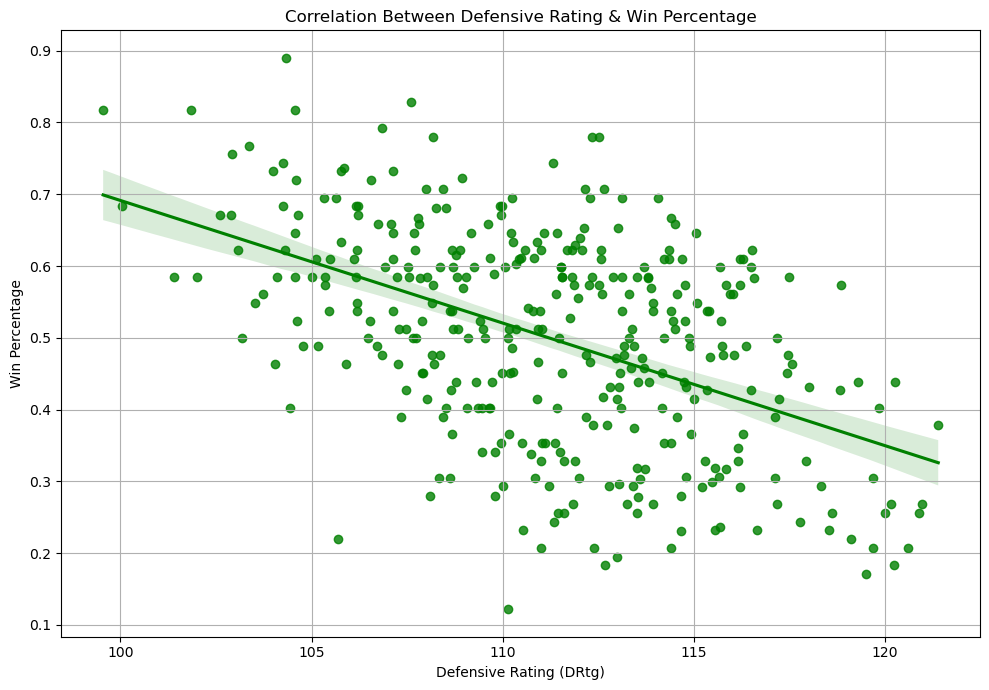

In [54]:
correlation = team_ratings[['DRtg', 'W/L%']].corr().loc['DRtg', 'W/L%']
print(f"Correlation between DRtg and Win %: {correlation}")



plt.figure(figsize=(10, 7))
sns.regplot(data=team_ratings, x='DRtg', y='W/L%', color='green')
plt.title("Correlation Between Defensive Rating & Win Percentage")
plt.xlabel("Defensive Rating (DRtg)")
plt.ylabel("Win Percentage")
plt.grid(True)
plt.tight_layout()
plt.show()


The scatterplot labeled Correlation Between Defensive Rating & Win Percentage has a regression line that shows a negative relationship between defensive ratings and win percentage. The correlation is -0.48 whcih shows a weak negative correlation. As the defensive ratings goes up the wins tend to decrease. 

In [56]:
#Find the Team with the Best DRtg and winning record.
winning_teams = team_ratings[team_ratings['W'] > team_ratings['L']]


best_defense_winner = winning_teams.loc[winning_teams['DRtg'].idxmin()]

print("Team with Best Defensive Rating AND Winning Record:")
print(f"Team: {best_defense_winner['Team']}")
print(f"Season: {best_defense_winner['Season']}")
print(f"Wins: {best_defense_winner['W']}, Losses: {best_defense_winner['L']}")
print(f"Defensive Rating (DRtg): {best_defense_winner['DRtg']}")


Team with Best Defensive Rating AND Winning Record:
Team: San Antonio Spurs
Season: 2016
Wins: 67, Losses: 15
Defensive Rating (DRtg): 99.55


Above shows the Team with the Best Defensive rating and Winning Record which is as follows:
Team:San Antonion Spurs
Season:2016
Record: 67-15
Defensive Rating (DRtg): 99.55